<a href="https://colab.research.google.com/github/babytwo133-source/NguyenTranVanAn_cuoiky/blob/main/cuoiky_phan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =================================================================
# Ô 1: CÀI ĐẶT THƯ VIỆN
# =================================================================
# Dùng dấu "!" để chạy lệnh terminal trong Colab
print("Bắt đầu cài đặt thư viện ultralytics...")
!pip install ultralytics matplotlib
print("Cài đặt hoàn tất!")

Bắt đầu cài đặt thư viện ultralytics...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.2 MB/s eta 0:00:00
Cài đặt hoàn tất!


In [ ]:
# =================================================================
# Ô 2: IMPORT CÁC THƯ VIỆN CẦN THIẾT
# =================================================================
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from collections import Counter
import urllib.request
from google.colab.patches import cv2_imshow # Dùng để hiển thị ảnh trong Colab

print("Đã import các thư viện thành công.")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Đã import các thư viện thành công.


In [ ]:
# =================================================================
# Ô 3 (Ảnh mới): TẢI MÔ HÌNH VÀ HÌNH ẢNH
# =================================================================

# URL mới của ảnh để demo (link ổn định từ GitHub, ảnh thú vị hơn)
# Đây là ảnh mẫu 'zidane.jpg' từ kho mã nguồn của Ultralytics (đội ngũ YOLO)
# Ảnh này có nhiều người, bóng, ghế, v.v.
image_url = "https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg"
image_path = "input_image.jpg"

# Dùng lệnh wget của Linux để tải ảnh
print(f"Bắt đầu tải ảnh từ URL: {image_url}")
# Thêm cờ -q để tải yên lặng, chỉ báo lỗi nếu có
!wget -q -O {image_path} "{image_url}"

# Kiểm tra xem file đã được tải về thành công chưa
import os
if os.path.exists(image_path) and os.path.getsize(image_path) > 0:
    print("Tải ảnh thành công!")
else:
    print("LỖI: Tải ảnh thất bại. Vui lòng kiểm tra lại kết nối mạng hoặc URL.")


# Tải mô hình YOLOv8 (phần này không thay đổi)
print("\nĐang tải mô hình YOLOv8... (Có thể mất vài phút cho lần đầu tiên)")
model = YOLO('yolov8n.pt')
print("Tải mô hình thành công!")

Bắt đầu tải ảnh từ URL: https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg
Tải ảnh thành công!

Đang tải mô hình YOLOv8... (Có thể mất vài phút cho lần đầu tiên)
Tải mô hình thành công!


Bắt đầu nhận dạng đối tượng...

0: 384x640 2 persons, 1 tie, 330.4ms
Speed: 22.5ms preprocess, 330.4ms inference, 34.0ms postprocess per image at shape (1, 3, 384, 640)
Nhận dạng hoàn tất!

--- ẢNH KẾT QUẢ PHÁT HIỆN ĐỐI TƯỢNG ---


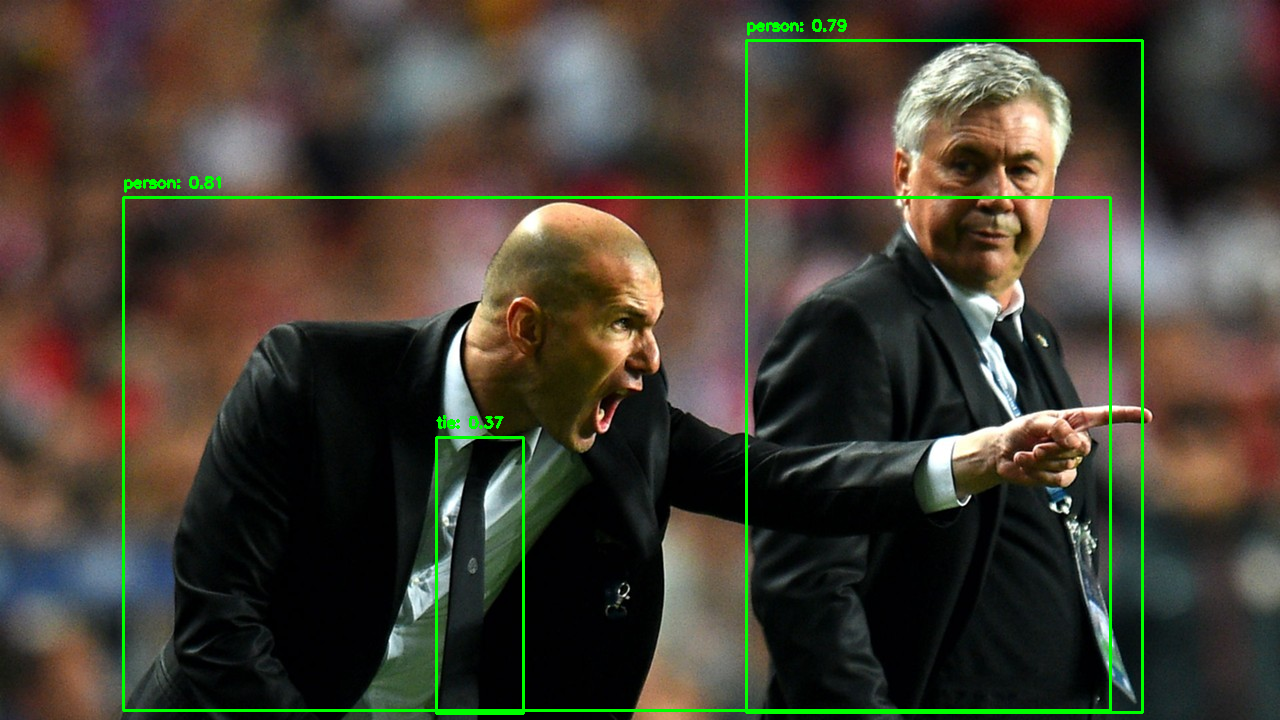

In [ ]:
# =================================================================
# Ô 4: NHẬN DẠNG ĐỐI TƯỢNG VÀ HIỂN THỊ ẢNH KẾT QUẢ
# =================================================================

# Đọc ảnh từ file đã tải về
img = cv2.imread(image_path)

# Kiểm tra xem ảnh đã được nạp thành công chưa
if img is None:
    print(f"LỖI: Không thể đọc được file ảnh tại đường dẫn '{image_path}'.")
    print("Vui lòng chạy lại Bước 3 để đảm bảo ảnh được tải về thành công.")
# Nếu ảnh được đọc thành công, tiếp tục xử lý
else:
    # Thực hiện nhận dạng đối tượng
    print("Bắt đầu nhận dạng đối tượng...")
    results = model(img)
    print("Nhận dạng hoàn tất!")

    # Lấy kết quả đầu tiên (vì chỉ xử lý 1 ảnh)
    result = results[0]
    detected_objects = []

    # Lặp qua các đối tượng được phát hiện để vẽ lên ảnh
    for box in result.boxes:
        # Lấy tên lớp (class name)
        class_id = int(box.cls[0].item())
        class_name = model.names[class_id]
        detected_objects.append(class_name)

        # Lấy tọa độ hộp bao (bounding box) và độ tin cậy
        x1, y1, x2, y2 = [int(i) for i in box.xyxy[0]]
        confidence = box.conf[0].item()

        # Tạo nhãn để hiển thị
        label = f"{class_name}: {confidence:.2f}"

        # Vẽ hộp bao và nhãn lên ảnh
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    print("\n--- ẢNH KẾT QUẢ PHÁT HIỆN ĐỐI TƯỢNG ---")
    # Sử dụng cv2_imshow để hiển thị ảnh trực tiếp trong notebook Colab
    cv2_imshow(img)

In [ ]:
# =================================================================
# Ô 4.5: PHÂN TÍCH SÂU VÀ TRÌNH BÀY KẾT QUẢ
# =================================================================
import pandas as pd # Thư viện mạnh mẽ để làm việc với bảng dữ liệu

# --- Phần 1: Tạo Bảng phân tích chi tiết ---
# Chúng ta sẽ trích xuất thông tin của từng đối tượng và đưa vào một bảng

# Kiểm tra xem có đối tượng nào được phát hiện không
if 'result' in locals() and len(result.boxes) > 0:
    detection_data = []
    # Lặp qua từng đối tượng đã phát hiện ở Bước 4
    for i, box in enumerate(result.boxes):
        class_id = int(box.cls[0].item())
        class_name = model.names[class_id]
        confidence = box.conf[0].item()
        x1, y1, x2, y2 = [int(coord) for coord in box.xyxy[0]]

        # Tính toán "thành phần nhỏ": Diện tích của hộp bao
        area = (x2 - x1) * (y2 - y1)

        detection_data.append({
            "ID": i + 1,
            "Đối tượng (Class)": class_name,
            "Độ tin cậy (Confidence)": f"{confidence:.2f}",
            "Toạ độ [x1, y1, x2, y2]": f"[{x1}, {y1}, {x2}, {y2}]",
            "Diện tích (pixels)": area
        })

    # Tạo một DataFrame (bảng) từ dữ liệu đã thu thập
    df_results = pd.DataFrame(detection_data)

    print("="*25, "Bảng 2.1: Kết quả chi tiết các đối tượng", "="*25)
    # Hiển thị bảng kết quả một cách đẹp mắt trong Colab
    display(df_results)

    # --- Phần 2: Giới thiệu công thức và độ đo ---
    print("\n\n" + "="*25, "Công thức và độ đo được sử dụng", "="*25)
    print("""
    Trong quá trình phân tích, một số độ đo cơ bản được sử dụng:

    1. Độ tin cậy (Confidence Score):
       - Là giá trị từ 0 đến 1 do mô hình YOLOv8 đưa ra, thể hiện mức độ "tự tin"
         của mô hình rằng nó đã nhận dạng đúng đối tượng.
       - Giá trị càng gần 1, độ chính xác càng cao.

    2. Diện tích hộp bao (Bounding Box Area):
       - Được tính toán để ước lượng kích thước của đối tượng trong ảnh.
       - Công thức: Area = (x2 - x1) * (y2 - y1)
         Trong đó (x1, y1) là toạ độ góc trên bên trái và (x2, y2) là toạ độ
         góc dưới bên phải của hộp bao.
    """)

    # --- Phần 3: Phân tích, nhận xét và kết luận tự động từ kết quả ---
    print("\n\n" + "="*25, "Phân tích và nhận xét kết quả", "="*25)

    # Lấy tổng số đối tượng
    total_objects = len(df_results)
    print(f"- Tổng quan: Mô hình đã phát hiện được tổng cộng {total_objects} đối tượng trong ảnh.")

    # Tìm đối tượng có độ tin cậy cao nhất và thấp nhất
    df_results['Độ tin cậy (Confidence)'] = df_results['Độ tin cậy (Confidence)'].astype(float)
    max_conf_obj = df_results.loc[df_results['Độ tin cậy (Confidence)'].idxmax()]
    min_conf_obj = df_results.loc[df_results['Độ tin cậy (Confidence)'].idxmin()]
    print(f"- Về độ tin cậy: Đối tượng '{max_conf_obj['Đối tượng (Class)']}' (ID {max_conf_obj['ID']}) được phát hiện với độ tin cậy cao nhất là {max_conf_obj['Độ tin cậy (Confidence)']:.2f}.")
    print(f"  Trong khi đó, đối tượng '{min_conf_obj['Đối tượng (Class)']}' (ID {min_conf_obj['ID']}) có độ tin cậy thấp nhất là {min_conf_obj['Độ tin cậy (Confidence)']:.2f}.")

    # Phân tích "từ phần nhỏ này sang phần nhỏ khác" (so sánh diện tích)
    df_results['Diện tích (pixels)'] = df_results['Diện tích (pixels)'].astype(int)
    largest_obj = df_results.loc[df_results['Diện tích (pixels)'].idxmax()]
    smallest_obj = df_results.loc[df_results['Diện tích (pixels)'].idxmin()]
    print(f"- Về kích thước: Dựa trên diện tích hộp bao, đối tượng '{largest_obj['Đối tượng (Class)']}' (ID {largest_obj['ID']}) chiếm diện tích lớn nhất trong ảnh ({largest_obj['Diện tích (pixels)']} pixels).")
    print(f"  Ngược lại, đối tượng '{smallest_obj['Đối tượng (Class)']}' (ID {smallest_obj['ID']}) là nhỏ nhất ({smallest_obj['Diện tích (pixels)']} pixels), điều này có thể giải thích cho độ tin cậy của nó.")

    # Đưa ra kết luận mẫu
    print("\n- Kết luận sơ bộ: Mô hình YOLOv8 hoạt động hiệu quả trong việc phát hiện các đối tượng chính trong ảnh. Các đối tượng lớn và rõ ràng thường có độ tin cậy cao. Các đối tượng nhỏ hơn hoặc bị che khuất một phần có thể có độ tin cậy thấp hơn một chút.")

else:
    print("Chưa có kết quả nào từ Bước 4 để phân tích. Vui lòng chạy lại Bước 4 trước.")

========================= Bảng 2.1: Kết quả chi tiết các đối tượng =========================


,ID,Đối tượng (Class),Độ tin cậy (Confidence),"Toạ độ [x1, y1, x2, y2]",Diện tích (pixels)
0,1,person,0.81,"[123, 197, 1110, 710]",506331
1,2,person,0.79,"[746, 40, 1142, 712]",266112
2,3,tie,0.37,"[436, 437, 523, 713]",24012




========================= Công thức và độ đo được sử dụng =========================

    Trong quá trình phân tích, một số độ đo cơ bản được sử dụng:

    1. Độ tin cậy (Confidence Score):
       - Là giá trị từ 0 đến 1 do mô hình YOLOv8 đưa ra, thể hiện mức độ "tự tin"
         của mô hình rằng nó đã nhận dạng đúng đối tượng.
       - Giá trị càng gần 1, độ chính xác càng cao.

    2. Diện tích hộp bao (Bounding Box Area):
       - Được tính toán để ước lượng kích thước của đối tượng trong ảnh.
       - Công thức: Area = (x2 - x1) * (y2 - y1)
         Trong đó (x1, y1) là toạ độ góc trên bên trái và (x2, y2) là toạ độ
         góc dưới bên phải của hộp bao.
    


========================= Phân tích và nhận xét kết quả =========================
- Tổng quan: Mô hình đã phát hiện được tổng cộng 3 đối tượng trong ảnh.
- Về độ tin cậy: Đối tượng 'person' (ID 1) được phát hiện với độ tin cậy cao nhất là 0.81.
  Trong khi đó, đối tượng 'tie' (ID 3) có độ tin cậy thấp nhất là 0.37.
- Về kí


--- THỐNG KÊ SỐ LƯỢNG CÁC ĐỐI TƯỢNG ---
- person: 2
- tie: 1

--- BIỂU ĐỒ PHÂN TÍCH ---


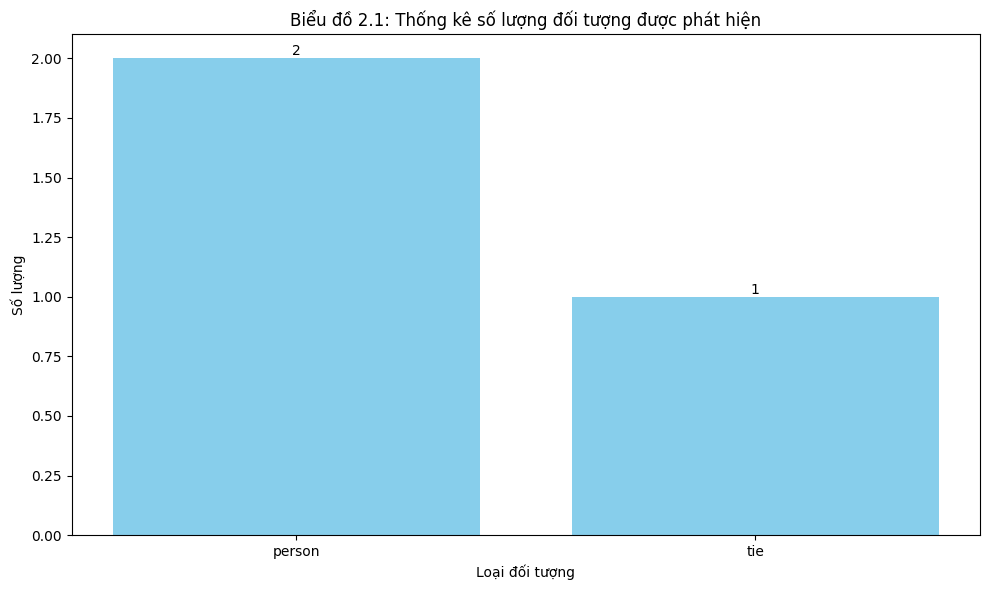

In [ ]:
# =================================================================
# Ô 5: PHÂN TÍCH THỐNG KÊ VÀ VẼ BIỂU ĐỒ
# =================================================================
# Đảm bảo `detected_objects` tồn tại trước khi sử dụng
if 'detected_objects' in locals() and detected_objects:
    # Đếm số lượng của mỗi loại đối tượng
    object_counts = Counter(detected_objects)

    print("\n--- THỐNG KÊ SỐ LƯỢNG CÁC ĐỐI TƯỢNG ---")
    for obj, count in object_counts.items():
        print(f"- {obj}: {count}")

    # Chuẩn bị dữ liệu cho biểu đồ
    labels = list(object_counts.keys())
    counts = list(object_counts.values())

    # Tạo và hiển thị biểu đồ
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, counts, color='skyblue')
    plt.title('Biểu đồ 2.1: Thống kê số lượng đối tượng được phát hiện')
    plt.xlabel('Loại đối tượng')
    plt.ylabel('Số lượng')
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Thêm số lượng trên mỗi cột
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

    print("\n--- BIỂU ĐỒ PHÂN TÍCH ---")
    plt.show()

else:
    print("Không có đối tượng nào được phát hiện để thống kê.")